In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sqlalchemy import create_engine
from google.cloud import bigquery
from pandas_gbq import read_gbq, to_gbq

In [4]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/rishikeshdhokare/Documents/Ironhack/instacart-441209-84de4dcbf601.json"


# What are the top 5 products

   product_id            product_name  AddToCartCount
0       24852                  Banana          115521
1       13176  Bag of Organic Bananas           82877
2       27845      Organic Whole Milk           32071
3       21137    Organic Strawberries           28875
4       47209    Organic Hass Avocado           24913
5       21903    Organic Baby Spinach           24412
6       47766         Organic Avocado           23393
7       19660            Spring Water           17552
8       16797            Strawberries           17073
9       27966     Organic Raspberries           14950


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_36452/1854672890.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AddToCartCount', y='product_name', data=top_products_df, palette='viridis')


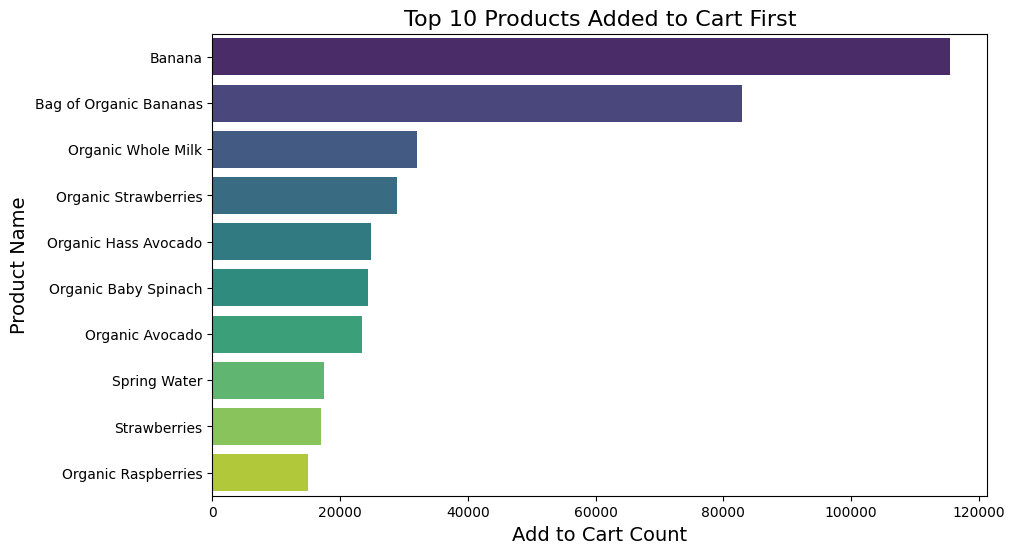

In [6]:
from google.cloud import bigquery
import pandas as pd

# Define your project and dataset
project_id = 'instacart-441209'
DATABASE_URI = f'bigquery://{project_id}'

# Create a function to fetch the top 5 products added to the cart first
def get_top_products(project_id):
    top_products_query = """
    WITH CombinedOrderProducts AS (
        SELECT product_id, add_to_cart_order
        FROM `instacart-441209.instacart.order_products_prior`
        UNION ALL
        SELECT product_id, add_to_cart_order
        FROM `instacart-441209.instacart.order_products_train`
    )

    SELECT cc.product_id,
           pp.product_name,
           COUNT(*) AS AddToCartCount
    FROM CombinedOrderProducts cc
    JOIN `instacart-441209.instacart.products` pp
    ON pp.product_id = cc.product_id
    WHERE cc.add_to_cart_order = 1
    GROUP BY cc.product_id, pp.product_name
    ORDER BY AddToCartCount DESC
    LIMIT 10;
    """
    
    # Create BigQuery client
    client = bigquery.Client(project=project_id)
    
    # Execute the query
    query_job = client.query(top_products_query)
    
    # Convert the query result to a pandas DataFrame
    top_products_df = query_job.to_dataframe()
    
    # Return the DataFrame
    return top_products_df

# Call the function and print the result
top_products_df = get_top_products(project_id)
print(top_products_df)

# Plotting the results using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='AddToCartCount', y='product_name', data=top_products_df, palette='viridis')

# Adding titles and labels
plt.title('Top 10 Products Added to Cart First', fontsize=16)
plt.xlabel('Add to Cart Count', fontsize=14)
plt.ylabel('Product Name', fontsize=14)

# Show the plot
plt.show()


## Top Users

   user_id  total_products_ordered
0   201268                    3725
1   129928                    3638
2   164055                    3061
3   186704                    2936
4   176478                    2921
5   182401                    2907
6   137629                    2901
7    33731                    2888
8   108187                    2760
9     4694                    2735


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_36452/4016128391.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_id', y='total_products_ordered', data=top_users_df, palette='viridis',


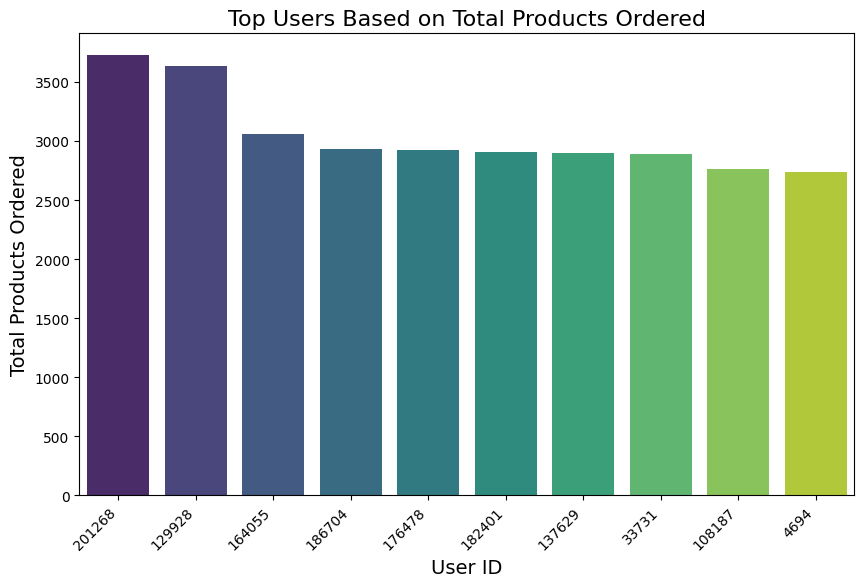

In [20]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your project and dataset
project_id = 'instacart-441209'

# Create a BigQuery client
client = bigquery.Client(project=project_id)

# Create a method to fetch the top users and plot the graph in the desired order
def get_top_users_and_plot(project_id):
    # Define the SQL query
    top_users_query = """
    WITH UserOrderCounts AS (
        SELECT o.user_id,
               COUNT(op.product_id) AS total_products_ordered
        FROM `instacart-441209.instacart.order_products_prior` op
        JOIN `instacart-441209.instacart.orders` o
        ON op.order_id = o.order_id
        GROUP BY o.user_id
    )
    SELECT uoc.user_id, uoc.total_products_ordered
    FROM UserOrderCounts uoc
    ORDER BY uoc.total_products_ordered DESC
    LIMIT 10;
    """
    
    # Execute the query
    query_job = client.query(top_users_query)
    
    # Wait for the query to finish and get the results
    top_users_result = query_job.result()
    
    # Convert the results into a pandas DataFrame
    top_users_df = top_users_result.to_dataframe()

    # Display the results
    print(top_users_df)

    # Sort the DataFrame in descending order by 'total_products_ordered'
    top_users_df = top_users_df.sort_values(by='total_products_ordered', ascending=False)

    # Plotting the results using seaborn
    plt.figure(figsize=(10, 6))

    # Pass the sorted 'user_id' order to the 'order' argument
    sns.barplot(x='user_id', y='total_products_ordered', data=top_users_df, palette='viridis',
                order=top_users_df['user_id'])

    # Adding titles and labels
    plt.title('Top Users Based on Total Products Ordered', fontsize=16)
    plt.xlabel('User ID', fontsize=14)
    plt.ylabel('Total Products Ordered', fontsize=14)

    # Rotate x-axis labels to make them readable
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

    # Return the DataFrame in case you want to inspect it later
    return top_users_df

# Call the method to fetch and plot the top users
top_users_df = get_top_users_and_plot(project_id)


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_36452/1977126766.py:10: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'pybigquery.sqlalchemy_bigquery.BigQueryDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine(DATABASE_URI)


Top Product Pairs Based on Purchase Frequency:
   product_id_1          product_name_1  product_id_2        product_name_2  \
0         13176  Bag of Organic Bananas         47209  Organic Hass Avocado   
1         13176  Bag of Organic Bananas         21137  Organic Strawberries   
2         21137    Organic Strawberries         24852                Banana   
3         24852                  Banana         47766       Organic Avocado   
4         21903    Organic Baby Spinach         24852                Banana   
5         13176  Bag of Organic Bananas         21903  Organic Baby Spinach   
6         16797            Strawberries         24852                Banana   
7         24852                  Banana         47626           Large Lemon   
8         21137    Organic Strawberries         47209  Organic Hass Avocado   
9         13176  Bag of Organic Bananas         27966   Organic Raspberries   

   purchase_count  
0           64761  
1           64702  
2           58330  
3  

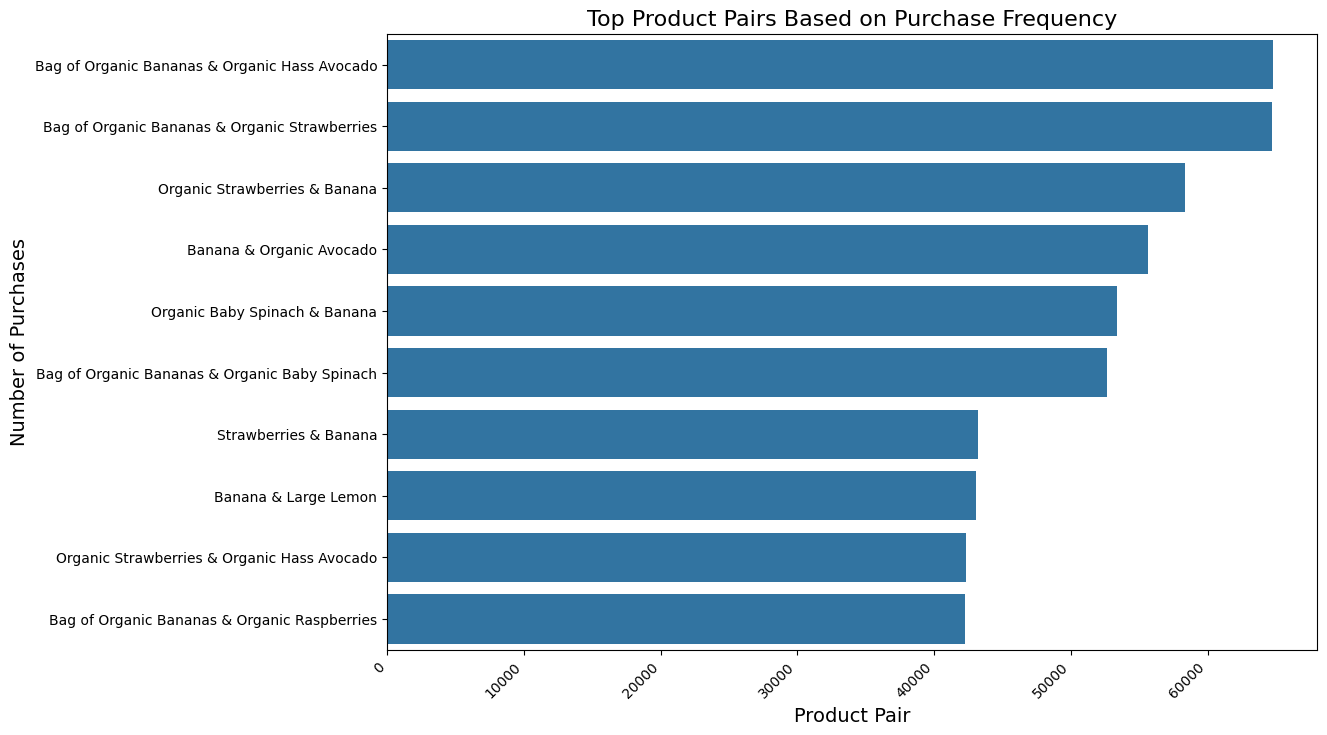

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import pandas as pd

project_id = 'instacart-441209'
DATABASE_URI = f'bigquery://{project_id}'

# Create a SQLAlchemy engine for BigQuery
engine = create_engine(DATABASE_URI)

# Method to fetch the top product pairs based on purchase frequency
def get_top_product_pairs():
    pair_combinations_query = """
    WITH CombinedOrders AS (
        SELECT order_id, product_id
        FROM `instacart-441209.instacart.order_products_prior`
        UNION ALL
        SELECT order_id, product_id
        FROM `instacart-441209.instacart.order_products_train`
    )

    SELECT
        p1.product_id AS product_id_1,
        p1.product_name AS product_name_1,
        p2.product_id AS product_id_2,
        p2.product_name AS product_name_2,
        COUNT(*) AS purchase_count
    FROM CombinedOrders co1
    JOIN CombinedOrders co2 ON co1.order_id = co2.order_id AND co1.product_id < co2.product_id
    JOIN `instacart-441209.instacart.products` p1 ON co1.product_id = p1.product_id
    JOIN `instacart-441209.instacart.products` p2 ON co2.product_id = p2.product_id
    GROUP BY p1.product_id, p1.product_name, p2.product_id, p2.product_name
    ORDER BY purchase_count DESC
    LIMIT 10;
    """
    pair_combinations_df = pd.read_sql(pair_combinations_query, engine)
    return pair_combinations_df

# Fetch top product pairs
top_product_pairs_df = get_top_product_pairs()

# Display the top product pairs
print("Top Product Pairs Based on Purchase Frequency:")
print(top_product_pairs_df)

# Create a new column combining product names
top_product_pairs_df['product_pair'] = top_product_pairs_df['product_name_1'] + " & " + top_product_pairs_df['product_name_2']

# Plotting the top product pairs with purchase_count on the y-axis
plt.figure(figsize=(12, 8))
sns.barplot(y='product_pair', x='purchase_count', data=top_product_pairs_df)

# Adding labels and title
plt.title('Top Product Pairs Based on Purchase Frequency', fontsize=16)
plt.xlabel('Product Pair', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)

# Rotate x-axis labels to make them readable
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [35]:
import pandas as pd
from sqlalchemy import create_engine

# Define BigQuery project
project_id = 'instacart-441209'
DATABASE_URI = f'bigquery://{project_id}'

# Create a SQLAlchemy engine for BigQuery
engine = create_engine(DATABASE_URI)

# Main function to get product recommendations
def get_recommendations(user_id):
    user_product_ids, user_products_df = get_user_products(user_id)
    pair_combinations_df = get_top_product_pairs()
    
    # Create a list for recommendations
    recommendations = []

    # Check if the user has ordered the products in the frequent pairs
    for _, row in pair_combinations_df.iterrows():
        if row['product_id_1'] not in user_product_ids:
            recommendations.append(row['product_name_1'])
        if row['product_id_2'] not in user_product_ids:
            recommendations.append(row['product_name_2'])

    # Get the top 5 recommended products (remove duplicates)
    recommendations = list(set(recommendations))[:5]

    return recommendations

# Specify the user ID for which recommendations are needed
user_id = 143095
recommended_products = get_recommendations(user_id)

print(f"Recommended Products for User {user_id}: {recommended_products}")


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_36452/1816867650.py:9: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'pybigquery.sqlalchemy_bigquery.BigQueryDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine(DATABASE_URI)


Recommended Products for User 143095: ['Strawberries', 'Organic Hass Avocado', 'Organic Strawberries', 'Organic Raspberries', 'Bag of Organic Bananas']


In [72]:
import pandas as pd
from sqlalchemy import create_engine

# Define BigQuery project
project_id = 'instacart-441209'
DATABASE_URI = f'bigquery://{project_id}'

# Create a SQLAlchemy engine for BigQuery
engine = create_engine(DATABASE_URI)

# Method to fetch the user's reordered products and their frequencies
def get_user_order_frequencies(user_id):
    user_order_freq_query = f"""
    SELECT 
        op.product_id,
        p.product_name,
        COUNT(op.order_id) AS order_count,
        SUM(op.reordered) AS reorder_count
    FROM `instacart-441209.instacart.order_products_prior` op
    JOIN `instacart-441209.instacart.orders` o ON op.order_id = o.order_id
    JOIN `instacart-441209.instacart.products` p ON op.product_id = p.product_id
    WHERE o.user_id = {user_id}
    GROUP BY op.product_id, p.product_name
    ORDER BY reorder_count DESC, order_count DESC
    """
    user_order_freq_df = pd.read_sql(user_order_freq_query, engine)
    return user_order_freq_df

# Method to predict the user's next order
def predict_next_order(user_id, top_n=10):
    user_order_freq_df = get_user_order_frequencies(user_id)
    
    # Select the top N frequently reordered products
    next_order_prediction = user_order_freq_df[user_order_freq_df['reorder_count'] > 0]
    next_order_prediction = next_order_prediction.head(top_n)
    
    return next_order_prediction[['product_name', 'order_count', 'reorder_count']]

# Specify the user ID for which the next order prediction is needed
user_id = 143095
predicted_next_order = predict_next_order(user_id)

print(f"Predicted Next Order for User {user_id}:\n{predicted_next_order}")


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_5169/1186830040.py:9: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'pybigquery.sqlalchemy_bigquery.BigQueryDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine(DATABASE_URI)


Predicted Next Order for User 143095:
                                     product_name  order_count  reorder_count
0            Honey Bunches Of Oats Roasted Cereal            7              6
1                       Regular Pork Sausage Tube            5              4
2     Sensitive Skin Moisturizing Cream Soap Bars            4              3
3                    Bathroom Tissue Double Rolls            4              3
4  Unsweetened Original Almond Breeze Almond Milk            4              3
5                          Dentastix Fresh, Large            4              3
6             Cage Free Brown Eggs-Large, Grade A            3              2
7                               Dried Blueberries            3              2
8                                         Avocado            3              2
9                                  Steel Cut Oats            3              2


In [94]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.metrics import precision_score, recall_score, f1_score

# Define BigQuery project
project_id = 'instacart-441209'
DATABASE_URI = f'bigquery://{project_id}'

# Create a SQLAlchemy engine for BigQuery
engine = create_engine(DATABASE_URI)

# Method to fetch the user's reordered products and their frequencies
def get_user_order_frequencies(user_id):
    user_order_freq_query = f"""
    SELECT 
        op.product_id,
        p.product_name,
        COUNT(op.order_id) AS order_count,
        SUM(op.reordered) AS reorder_count
    FROM 
        `instacart-441209.instacart.order_products_prior` op
    JOIN 
        `instacart-441209.instacart.orders` o ON op.order_id = o.order_id
    JOIN 
        `instacart-441209.instacart.products` p ON op.product_id = p.product_id
    WHERE 
        o.user_id = {user_id}
    GROUP BY 
        op.product_id, p.product_name
    ORDER BY 
        reorder_count DESC, order_count DESC
    """
    user_order_freq_df = pd.read_sql(user_order_freq_query, engine)
    return user_order_freq_df

# Method to predict the user's next order
def predict_next_order(user_id, top_n=10):
    user_order_freq_df = get_user_order_frequencies(user_id)
    
    # Select the top N frequently reordered products
    next_order_prediction = user_order_freq_df[user_order_freq_df['reorder_count'] > 0]
    next_order_prediction = next_order_prediction.head(top_n)
    
    # Ensure product_id is included
    return next_order_prediction[['product_id', 'product_name', 'order_count', 'reorder_count']]

# Method to fetch the actual next order for a user
def get_actual_next_order(user_id):
    actual_next_order_query = f"""
    SELECT DISTINCT
        product_id
    FROM
        `instacart-441209.instacart.order_products_prior` op
    JOIN 
        `instacart-441209.instacart.orders` o ON op.order_id = o.order_id
    WHERE
        o.user_id = {user_id}
        AND op.reordered = 1  -- Look for reordered items
    """
    actual_next_order_df = pd.read_sql(actual_next_order_query, engine)
    return set(actual_next_order_df['product_id'])

# Method to evaluate prediction accuracy
def evaluate_prediction_accuracy(user_id, top_n=10):
    predicted_next_order_df = predict_next_order(user_id, top_n)
    
    # Now that product_id is included, we can extract it
    predicted_products = set(predicted_next_order_df['product_id'])
    actual_products = get_actual_next_order(user_id)

    # Debugging: Check if predicted and actual sets are empty or mismatched
    if not predicted_products:
        print("No products predicted for the next order.")
    if not actual_products:
        print("No actual reordered products found for the user's next order.")
        
    print("Predicted products:", predicted_products)
    print("Actual products:", actual_products)

    # Check if there's overlap in the sets
    common_products = predicted_products.intersection(actual_products)
    print("Common products:", common_products)
    
    # If there's no overlap, we won't be able to calculate precision, recall, F1 accurately.
    if not common_products:
        print("No overlap between predicted and actual products.")
        return 0.0, 0.0, 0.0

    # Convert sets to binary format for metrics calculation
    y_true = [1 if product in actual_products else 0 for product in predicted_products]
    y_pred = [1] * len(predicted_products)  # Assume all predicted products are positive
    
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return precision, recall, f1

# Specify the user ID and get accuracy metrics
user_id = 143095
precision, recall, f1 = evaluate_prediction_accuracy(user_id)

# Print the results
print(f"\nPrediction Accuracy for User {user_id}:\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_5169/2560905078.py:10: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'pybigquery.sqlalchemy_bigquery.BigQueryDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine(DATABASE_URI)


Predicted products: {47144, 12299, 40332, 45965, 12174, 48527, 30960, 35601, 23410, 10235}
Actual products: {47144, 12299, 40332, 45965, 12174, 48527, 30960, 35601, 23410, 10235}
Common products: {47144, 12299, 40332, 45965, 12174, 48527, 30960, 35601, 23410, 10235}

Prediction Accuracy for User 143095:

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
